<a href="https://colab.research.google.com/github/gaelarias/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Gael___Arias_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# importing libarys

In [0]:
'''
7. Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year'''

csv = 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
column_header =['age','operation_year','pos_axil_nodes','survived_5y']
df = pd.read_csv(csv,names=column_header,header=1)
# importing data set


In [174]:
df.isnull().sum()


age               0
operation_year    0
pos_axil_nodes    0
survived_5y       0
dtype: int64

In [0]:
df['survived_5y'] = df.survived_5y.replace(2,0)
#converting 2 in survive to 0

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# convert dataset to arrays for crosstab
age_bin = np.array(pd.cut(df.age,5)) # bining age data in to 5 bins
axill_bin = np.array(pd.cut(df.pos_axil_nodes,5))# bining pos_axil_nodes in to 10 bins

survive = np.array(df.survived_5y)
age = np.array(df.age) 
axill = np.array(df.pos_axil_nodes)

In [284]:

pd.crosstab(survive, age_bin,normalize='columns')


col_0,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
row_0,,,,,
0,0.097561,0.313131,0.28125,0.271186,0.333333
1,0.902439,0.686869,0.71875,0.728814,0.666667


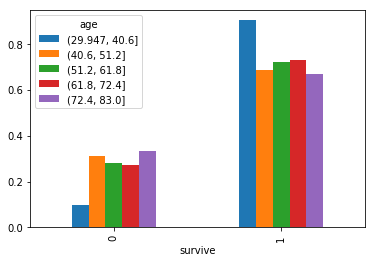

In [285]:
#pd.crosstab( survive ,axill, age_bin)

ct = pd.crosstab( survive, age_bin, normalize='columns',rownames=['survive'],colnames=['age'])
ct.plot( kind ='bar')


In [0]:
ct2 = pd.crosstab(axill_bin ,survive, rownames=['Positive_axill_operations'],colnames=['survive'])


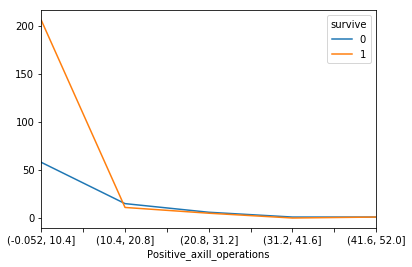

In [308]:
ct2.plot()


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.



1.   Age has a positive realation ship with survival

2.   Year of operation has a negative relationship with survival. It look like it would be verry had to make a prediction on the year of operation.

3.   Age has a positive relationship with survival because the survival rate can be pridicted on age somewhat.
    when the person in the data set is younger they are much more likly to get a 1 in the survive column. 
    its about a 90% for living past 5 years for someone in the age range of 30 -40, and only a 66% for some that is in tha age range 72-83
    With the second graph positive axill operation has a corrilation with survival as well. The less axill operation you have the more likly
    you are to survive.
    if you have less than 5 axil operation you have a 80% change of geting a 1
    






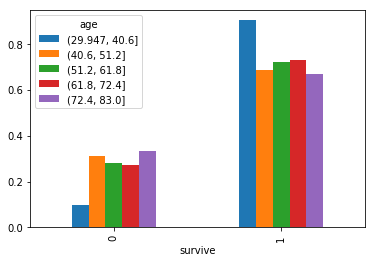

In [259]:
ct.plot( kind ='bar')


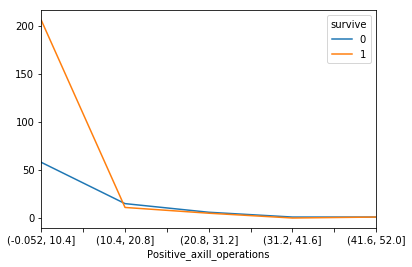

In [309]:
ct2.plot()
